In [138]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib



20


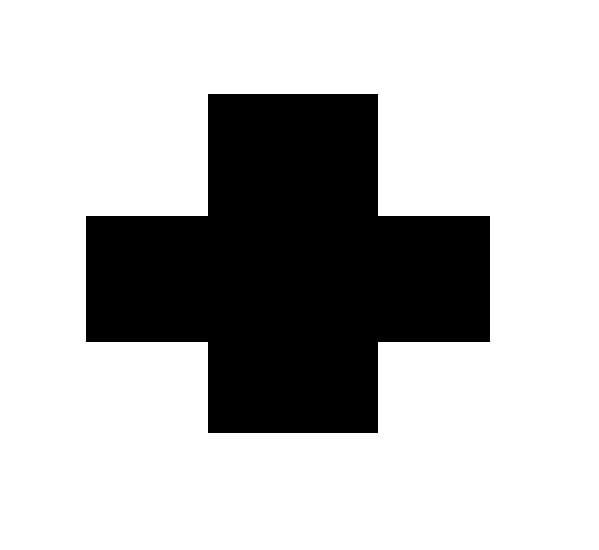

In [139]:
path = 'C:\\Users\\ver6642m\\Desktop\\lokal_11_07\\vhb_19-20\\Notebooks\\TestDatensatz2'



data_path = pathlib.Path(path)


img_count = len(list(data_path.glob('*/*.png')))
print(img_count)

circles = list(data_path.glob('Plus/*'))
PIL.Image.open(str(circles[0]))

In [140]:
batch_size = 32
img_height = 128
img_width = 128

#Daten in Training (80%) und Validierung (20%) einteilen
training_data = tf.keras.preprocessing.image_dataset_from_directory(data_path, color_mode='grayscale', validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(data_path, color_mode='grayscale', validation_split=0.2, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)



Found 20 files belonging to 2 classes.
Using 16 files for training.
Found 20 files belonging to 2 classes.
Using 4 files for validation.


In [141]:
#Modell erstellen
num_classes = 2

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(1,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(2, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(3, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_33 (Rescaling)     (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 128, 128, 1)       10        
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 64, 64, 2)         20        
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 32, 32, 2)         0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 32, 32, 3)         57        
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 16, 16, 3)       

In [142]:
#Modell trainieren
epochs = 10
history = model.fit(training_data, validation_data = validation_data, epochs=epochs)

Epoch 1/10
1/1 [==============================] - 0s 142ms/step - loss: 0.7877 - accuracy: 0.5625 - val_loss: 0.7169 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 68ms/step - loss: 0.7051 - accuracy: 0.5625 - val_loss: 0.7439 - val_accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 0s 68ms/step - loss: 0.5776 - accuracy: 0.8125 - val_loss: 0.7671 - val_accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 0s 68ms/step - loss: 0.5809 - accuracy: 0.6250 - val_loss: 0.8076 - val_accuracy: 0.2500
Epoch 5/10
1/1 [==============================] - 0s 69ms/step - loss: 0.4696 - accuracy: 0.9375 - val_loss: 0.8602 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 68ms/step - loss: 0.4321 - accuracy: 0.8125 - val_loss: 0.9039 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 70ms/step - loss: 0.4457 - accuracy: 0.8750 - val_loss: 0.9211 - val_accuracy: 0.5000
Epoch 8/10
1/1 [==========

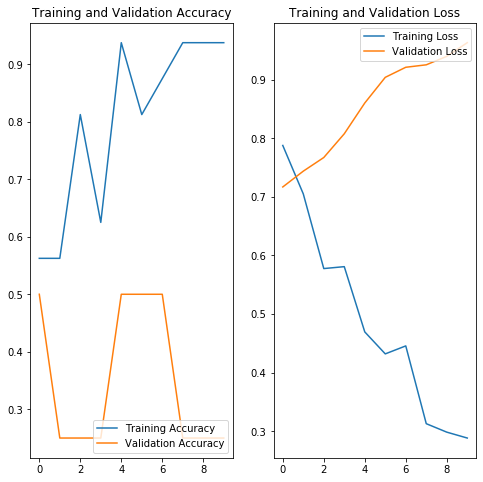

In [143]:
#Visualisiern des Ergebnisses
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [144]:
datenerweiterung = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width,1)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
    ])

model = Sequential([
    datenerweiterung,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(1,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(2, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(3, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_36 (Sequential)   (None, 128, 128, 1)       0         
_________________________________________________________________
rescaling_34 (Rescaling)     (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 128, 128, 1)       10        
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 64, 64, 2)         20        
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 32, 32, 2)         0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 32, 32, 3)       

In [145]:
#Modell trainieren
epochs = 10
history = model.fit(training_data, validation_data = validation_data, epochs=epochs)

Epoch 1/10
1/1 [==============================] - 0s 142ms/step - loss: 0.6972 - accuracy: 0.5625 - val_loss: 0.6934 - val_accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 71ms/step - loss: 0.6934 - accuracy: 0.5625 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 68ms/step - loss: 0.6956 - accuracy: 0.5000 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 65ms/step - loss: 0.6927 - accuracy: 0.5625 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 69ms/step - loss: 0.6848 - accuracy: 0.5625 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 67ms/step - loss: 0.6801 - accuracy: 0.5625 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 69ms/step - loss: 0.6846 - accuracy: 0.5000 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 8/10
1/1 [==========

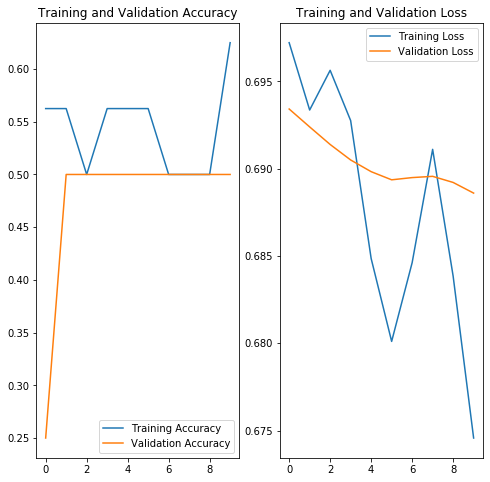

In [146]:
#Visualisiern des Ergebnisses
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()